# Applying the Model

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
img_md_subset = pd.read_csv('../../../Data/ifcb_ecotaxa_subset_update.csv')
img_md_subset = img_md_subset.drop('Unnamed: 0', 1)

In [4]:
img_md_subset = pd.read_csv('../../../Data/ecotaxa_export_3203_20200909_1843.tsv', sep='\t')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,9,10,262,263) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
img_md_subset.head()

,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_soft_version,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument,acq_resolution_pixels_per_micron
0,D20180221T193119_IFCB116_01153,-64.7535,-64.1339,20180221,193119,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
1,D20180221T202431_IFCB116_00153,-64.7741,-64.1655,20180221,202431,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
2,D20180221T202431_IFCB116_01303,-64.7741,-64.1655,20180221,202431,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
3,D20180221T202431_IFCB116_03008,-64.7741,-64.1655,20180221,202431,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
4,D20180221T212254_IFCB116_07034,-64.7802,-63.9785,20180221,212254,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4


In [6]:
len(img_md_subset)

1977145

In [7]:
# For now only using validated images
#img_md_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']

rare_count = 125

unique_validated = img_md_subset[img_md_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

rare_classes = unique_validated[unique_validated <= rare_count]

#val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(rare_classes.index))]
rare_classes

object_annotation_category
Asteromphalus                  5
Banquisia belgicae            43
Cocconeis                     13
Crustacea                      7
Dinophysis                    29
Diplopsalis<Dinophyceae X     12
Eucampia                     102
Eucampia chain                62
Gyrodinium                    85
Licmophora                    78
Membraneis chain               8
Odontella sp.                 37
Pleurosigma                    1
Rhizosolenia                  82
Tintinnida                    43
Torodinium                   110
Warnowia                      31
centric 10 temp                5
centric 4 temp                46
chain<centric                 31
t004                          12
t006                          48
t009                          70
t016                          75
t017                          26
t020                           4
Name: object_id, dtype: int64

In [8]:
img_md_subset.columns

Index(['object_id', 'object_lat', 'object_lon', 'object_date', 'object_time',
       'object_link', 'object_depth_min', 'object_depth_max',
       'object_annotation_status', 'object_annotation_person_name',
       ...
       'process_soft_version', 'process_script', 'process_script_version',
       'process_library', 'process_library_version', 'process_date',
       'process_time', 'acq_id', 'acq_instrument',
       'acq_resolution_pixels_per_micron'],
      dtype='object', length=280)

In [9]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [10]:
import glob, os

file_dir = '../../../Data/140920_export/'

os.chdir(file_dir)
fn_list = []
for file in glob.glob("*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[:-4] for x in fn_list]

available_subset = img_md_subset[img_md_subset['object_id'].isin(fn_edit)]
len(available_subset)

1976948


1977145

In [11]:
import sys
 
sys.getsizeof(fn_edit) / 1e9

0.017632632

In [12]:
del fn_edit

In [13]:
del img_md_subset

In [14]:
class_id_dict = {'Amphiprora': 0,
 'Bacillariophyceae': 1,
 'Banquisia belgicae': 2,
 'Ceratium': 3,
 'Chaetoceros single': 4,
 'Chaetoceros<Mediophyceae': 5,
 'Ciliophora': 6,
 'Corethron': 7,
 'Cryptophyta': 8,
 'Cylindrotheca': 9,
 'Dactyliosolen': 10,
 'Dictyochales': 11,
 'Dinophyceae': 12,
 'Dinophysis': 13,
 'Eucampia': 14,
 'Eucampia chain': 15,
 'Guinardia': 16,
 'Gymnodinium': 17,
 'Gyrodinium': 18,
 'Katodinium': 19,
 'Licmophora': 20,
 'Membraneis': 21,
 'Navicula': 22,
 'Nitzschia frigida': 23,
 'Odontella sp.': 24,
 'Phaeocystis': 25,
 'Proboscia sp.': 26,
 'Pseudo-Nitzschia chain': 27,
 'Pyramimonas': 28,
 'Rhizosolenia': 29,
 'Thalassiosira': 30,
 'Tintinnida': 31,
 'Torodinium': 32,
 'Warnowia': 33,
 'badfocus<artefact': 34,
 'bead': 35,
 'bubble': 36,
 'centric': 37,
 'centric 1 temp': 38,
 'centric 2 temp': 39,
 'centric 3 temp': 40,
 'centric 4 temp': 41,
 'centric 6 temp': 42,
 'chain<centric': 43,
 'chain<pennate': 44,
 'detritus': 45,
 'dinoflagellate-i': 46,
 'dinoflagellate-ii': 47,
 'dinoflagellate-iii': 48,
 'multiple<other': 49,
 'part<other': 50,
 'pennate 10 temp': 51,
 'pennate 11 temp': 52,
 'pennate 2 temp': 53,
 'pennate 7 temp': 54,
 'pennate<Bacillariophyta': 55,
 't002': 56,
 't003': 57,
 't005': 58,
 't006': 59,
 't007': 60,
 't008': 61,
 't009': 62,
 't010': 63,
 't011': 64,
 't012': 65,
 't013': 66,
 't016': 67,
 't017': 68,
 't019': 69,
 'temp cylindrotheca': 70}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

In [15]:
len(class_id_dict)

71

In [16]:
frac = 0.05
int(len(available_subset) * frac)

98857

In [17]:
available_subset.memory_usage(index=True).sum() / 1e9

4.44462196

In [18]:
len(available_subset)

1977145

In [19]:
#prediction_subset = available_subset.sample(frac=frac)
prediction_subset = available_subset[:1900000]

In [20]:
del available_subset

In [21]:
prediction_subset.head()

,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_soft_version,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument,acq_resolution_pixels_per_micron
0,D20180221T193119_IFCB116_01153,-64.7535,-64.1339,20180221,193119,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
1,D20180221T202431_IFCB116_00153,-64.7741,-64.1655,20180221,202431,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
2,D20180221T202431_IFCB116_01303,-64.7741,-64.1655,20180221,202431,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
3,D20180221T202431_IFCB116_03008,-64.7741,-64.1655,20180221,202431,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4
4,D20180221T212254_IFCB116_07034,-64.7802,-63.9785,20180221,212254,NaN,5.0,5.0,validated,Schuyler Nardelli,...,R2016a,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,IFCB116,IFCB,3.4


In [22]:
len(prediction_subset)

1900000

In [23]:
from tensorflow import keras

model = keras.models.load_model('../model_weights_all_classes_flu.hdf5')

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np

def generate_data(available_subset, batch_size):
    """Replaces Keras' native ImageDataGenerator."""
    i = 0
    while True:
        images = []
        labels = []
        merged_labels = []
        original_labels = []
        flu_data = []
        
        for b in range(batch_size):
            if i >= len(available_subset):
                i=0
            row = available_subset.iloc[i]
            i+=1
            
            img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
            images.append(image.img_to_array(img))
            #labels.append(class_id_dict[row['merged_category']])
            #merged_labels.append(row['merged_category'])
            original_labels.append(row['object_annotation_category'])
            flu_data.append([row['object_pmt_fluorescence'], row['object_peak_fluorescence']])
        
        image_batch = np.array(images) / 130
        flu_batch = np.array(flu_data)
        
        
        yield [image_batch, flu_batch]

In [25]:
1900000 / 1000

1900.0

In [26]:
predict_prob = model.predict_generator(generator = generate_data(prediction_subset,batch_size=1000), steps=1900, verbose=1)
#predict_prob = model.predict([X_predict, flu_data])

1900/1900 [==============================] - 1924s 1s/step


In [27]:
predict_prob.shape

(1900000, 71)

In [28]:
predictions = np.argmax(predict_prob, axis=1)

In [29]:
predict_prob_values = []
for i in range(len(predictions)):
    predict_prob_values.append(predict_prob[i][predictions[i]])

In [30]:
np.mean(predict_prob_values), np.std(predict_prob_values)

(0.88645464, 0.16983992)

In [31]:
prediction_subset['image_file_name'] = prediction_subset['object_id'] + '.png'

In [32]:
prediction_subset['object_annotation_category'] = [id_class_dict[x] for x in predictions]

In [33]:
prediction_subset['object_score'] = predict_prob_values

In [34]:
prediction_subset['object_annotation_status'] = 'Predicted'

In [35]:
prediction_subset = prediction_subset[['object_id','object_annotation_status','object_annotation_category','sample_flag','object_lat','object_lon','image_file_name','object_score']]

In [36]:
len(prediction_subset)

1900000

In [37]:
prediction_subset.head()

,object_id,object_annotation_status,object_annotation_category,sample_flag,object_lat,object_lon,image_file_name,object_score
0,D20180221T193119_IFCB116_01153,Predicted,Pyramimonas,good,-64.7535,-64.1339,D20180221T193119_IFCB116_01153.png,0.954375
1,D20180221T202431_IFCB116_00153,Predicted,Gymnodinium,good,-64.7741,-64.1655,D20180221T202431_IFCB116_00153.png,0.999927
2,D20180221T202431_IFCB116_01303,Predicted,Gymnodinium,good,-64.7741,-64.1655,D20180221T202431_IFCB116_01303.png,0.999307
3,D20180221T202431_IFCB116_03008,Predicted,Katodinium,good,-64.7741,-64.1655,D20180221T202431_IFCB116_03008.png,0.999095
4,D20180221T212254_IFCB116_07034,Predicted,t012,good,-64.7802,-63.9785,D20180221T212254_IFCB116_07034.png,0.419310


In [38]:
classes, counts = np.unique(predictions, return_counts=True)
classes, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70]),
 array([  3342,  29316,     65,    236,   3562,   4099,   2883,   2493,
         89240,   5776,   2990,   2544,  14319,     36,    166,     81,
           675,  12441,    161,   1805,    489,    354,   1938,  26390,
            74,   3270,   1177,   6176,  67623,    215,   2603,     86,
           410,     64, 170644,  18464,   4253,   8596,   2608,  13393,
          3285,    353,   1560,     41,   1986,  36191,   8038,  14194,
           276,   6271,   4326,   4408,   3094,  84511,   1300,   2216,
        485166, 164551,    392,    404,  14357, 176430,    618, 111044,
        128263,  90094,   3868,   3154,   1208,   5362,  37982]))

In [39]:
# go through the final predictions and find images where there are less than 150 validated and only include those in the final

# then only get ~300 of those maximum

In [40]:
rare_classes.index

Index(['Asteromphalus', 'Banquisia belgicae', 'Cocconeis', 'Crustacea',
       'Dinophysis', 'Diplopsalis<Dinophyceae X', 'Eucampia', 'Eucampia chain',
       'Gyrodinium', 'Licmophora', 'Membraneis chain', 'Odontella sp.',
       'Pleurosigma', 'Rhizosolenia', 'Tintinnida', 'Torodinium', 'Warnowia',
       'centric 10 temp', 'centric 4 temp', 'chain<centric', 't004', 't006',
       't009', 't016', 't017', 't020'],
      dtype='object', name='object_annotation_category')

In [41]:
rare_prediction_subset = prediction_subset[prediction_subset['object_annotation_category'].isin(list(rare_classes.index))]

In [42]:
rare_prediction_subset.head()

,object_id,object_annotation_status,object_annotation_category,sample_flag,object_lat,object_lon,image_file_name,object_score
14,D20180221T212254_IFCB116_00164,Predicted,centric 4 temp,good,-64.7802,-63.9785,D20180221T212254_IFCB116_00164.png,0.995498
17,D20180221T224418_IFCB116_01718,Predicted,Licmophora,questionnable,-64.7980,-63.9793,D20180221T224418_IFCB116_01718.png,0.999981
35,D20180228T184713_IFCB116_00856,Predicted,Gyrodinium,good,-64.7356,-64.1037,D20180228T184713_IFCB116_00856.png,0.775528
40,D20180228T193956_IFCB116_00105,Predicted,Tintinnida,good,-64.7356,-64.1037,D20180228T193956_IFCB116_00105.png,0.999988
41,D20180228T193956_IFCB116_02715,Predicted,centric 4 temp,good,-64.7356,-64.1037,D20180228T193956_IFCB116_02715.png,0.959738


In [50]:
prediction_counts = rare_prediction_subset.groupby('object_annotation_category')['object_id'].nunique()
prediction_counts

object_annotation_category
Banquisia belgicae      64
Dinophysis              36
Eucampia               166
Eucampia chain          81
Gyrodinium             159
Licmophora             484
Odontella sp.           74
Rhizosolenia           215
Tintinnida              86
Torodinium             410
Warnowia                59
centric 4 temp         351
chain<centric           41
t006                   404
t009                   605
t016                  3154
t017                  1208
Name: object_id, dtype: int64

In [ ]:
Asteromphalus                  5
Cocconeis                     13
Crustacea                      7
Diplopsalis<Dinophyceae X     12
Membraneis chain               8
Pleurosigma                    1
centric 10 temp                5
t020                           4
t004                          12




Banquisia belgicae            43

Dinophysis                    29

Eucampia                     102
Eucampia chain                62
Gyrodinium                    85
Licmophora                    78
Odontella sp.                 37
Rhizosolenia                  82
Tintinnida                    43
Torodinium                   110
Warnowia                      31
centric 4 temp                46
chain<centric                 31
t006                          48
t009                          70
t016                          75
t017                          26


In [51]:
len(rare_prediction_subset)

7625

In [52]:
rare_prediction_subset = rare_prediction_subset.sort_values('object_score', ascending=False)

In [53]:
buckets = {}
for key in id_class_dict:
    buckets[key] = 0

object_ids = []

max_count = 300

for index, row in rare_prediction_subset.iterrows():
    if buckets[class_id_dict[row['object_annotation_category']]] < max_count:
        object_ids.append(row['object_id'])
        buckets[class_id_dict[row['object_annotation_category']]] += 1
len(object_ids)

rare_cut_df = rare_prediction_subset[rare_prediction_subset['object_id'].isin(object_ids)]
rare_cut_df.head()

,object_id,object_annotation_status,object_annotation_category,sample_flag,object_lat,object_lon,image_file_name,object_score
1382105,D20180118T064118_IFCB116_01748,Predicted,centric 4 temp,good,-69.2503,-76.1438,D20180118T064118_IFCB116_01748.png,1.0
1470301,D20180128T012708_IFCB116_00681,Predicted,centric 4 temp,good,-66.5710,-67.1667,D20180128T012708_IFCB116_00681.png,1.0
468219,D20190121T024844_IFCB116_02944,Predicted,chain<centric,good,-68.3802,-71.7153,D20190121T024844_IFCB116_02944.png,1.0
1467032,D20180128T004007_IFCB116_03329,Predicted,centric 4 temp,good,-66.5710,-67.1667,D20180128T004007_IFCB116_03329.png,1.0
467952,D20190121T024844_IFCB116_02674,Predicted,chain<centric,good,-68.3802,-71.7153,D20190121T024844_IFCB116_02674.png,1.0


In [54]:
len(rare_cut_df)

3089

In [55]:
dtps = []
for dt in rare_cut_df.dtypes:
    if dt == 'float64':
        dtps.append('f')
    elif dt == 'object':
        dtps.append('t')
for f in dtps:
    print('['+f+']')

[t]
[t]
[t]
[t]
[f]
[f]
[t]
[f]


In [59]:
prediction_subset.to_csv('../ecotaxa_cnn_predictions_1900000_051020.csv', sep='\t')
#rare_cut_df.to_csv('../ecotaxa_cnn_predictions_1900000_rare_051020.csv', sep='\t')

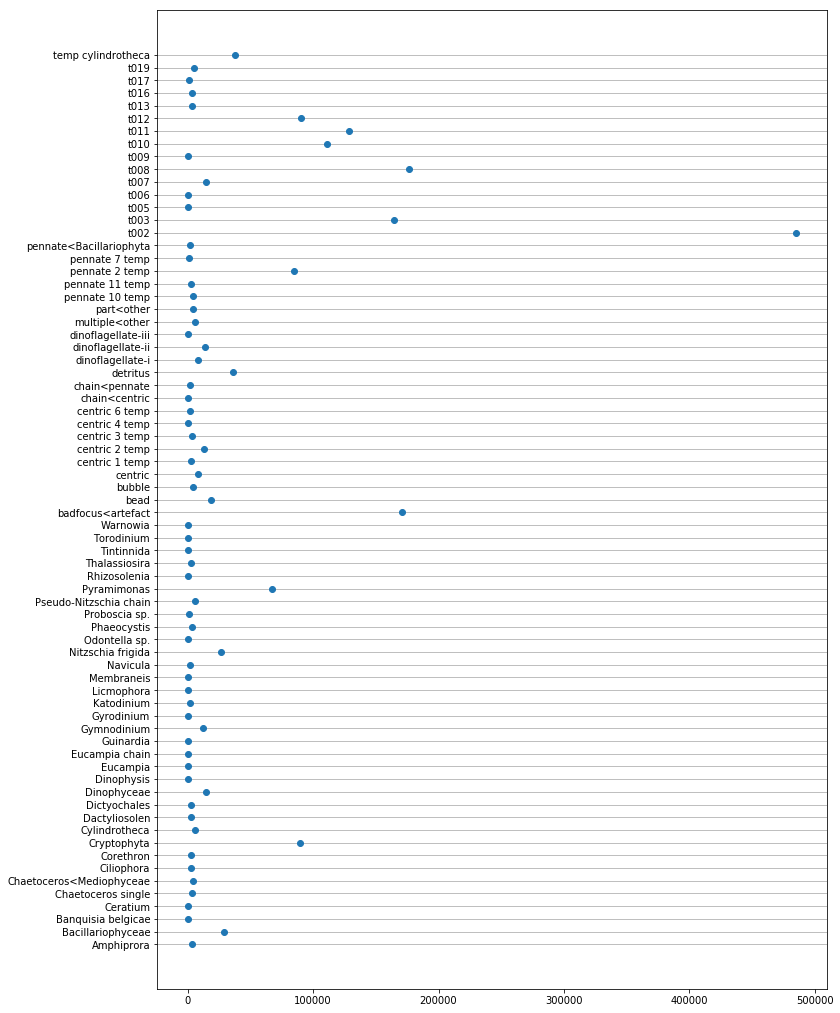

In [58]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(counts, classes)
ax.set_yticks(classes)
ax.set_yticklabels([id_class_dict[x] for x in classes])
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('output_predictions.png', dpi=300)
plt.show()

In [146]:
min_count = 20
unique_validated = available_subset.groupby('object_annotation_category')['object_id'].nunique()

sufficient_classes = unique_validated[unique_validated >= min_count]

In [147]:
len(sufficient_classes)

73

In [46]:
#classes, counts = np.unique(labels, return_counts=True)
classes, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]),
 array([  26,  296,    1,    6,   58,   83,   39,   18,  935,   51,   14,
          28,  143,    1,    2,    1,    4,  169,   16,    9,    6,   21,
         492,    1,   15,    6,   65,  362,    5,   37,    1, 1671,  563,
          62,   85,   48,  142,   34,    3,   10,   19,  469,  140,  141,
           2,   44,   94,   52,   33,  877,   12,   16, 5581, 1519,    9,
           6,  244, 1566,    2, 1348,  874,  857,   22,   36,   25,   50,
         204]))

In [47]:
sufficient_classes

object_annotation_category
Amphiprora                     5339
Bacillariophyceae             28443
Banquisia belgicae               46
Ceratium                        224
Chaetoceros single             4805
Chaetoceros<Mediophyceae       1438
Ciliophora                     7245
Corethron                       919
Cryptophyta                   70779
Cylindrotheca                  3572
Dactyliosolen                   708
Dictyochales                  12322
Dinophyceae                   12792
Dinophysis                       48
Diplopsalis<Dinophyceae X        22
Eucampia                        279
Eucampia chain                   74
Guinardia                       518
Gymnodinium                   14367
Gyrodinium                      174
Katodinium                      838
Licmophora                      104
Membraneis                      322
Navicula                       1484
Nitzschia frigida             20343
Odontella sp.                    37
Phaeocystis                    2792
P

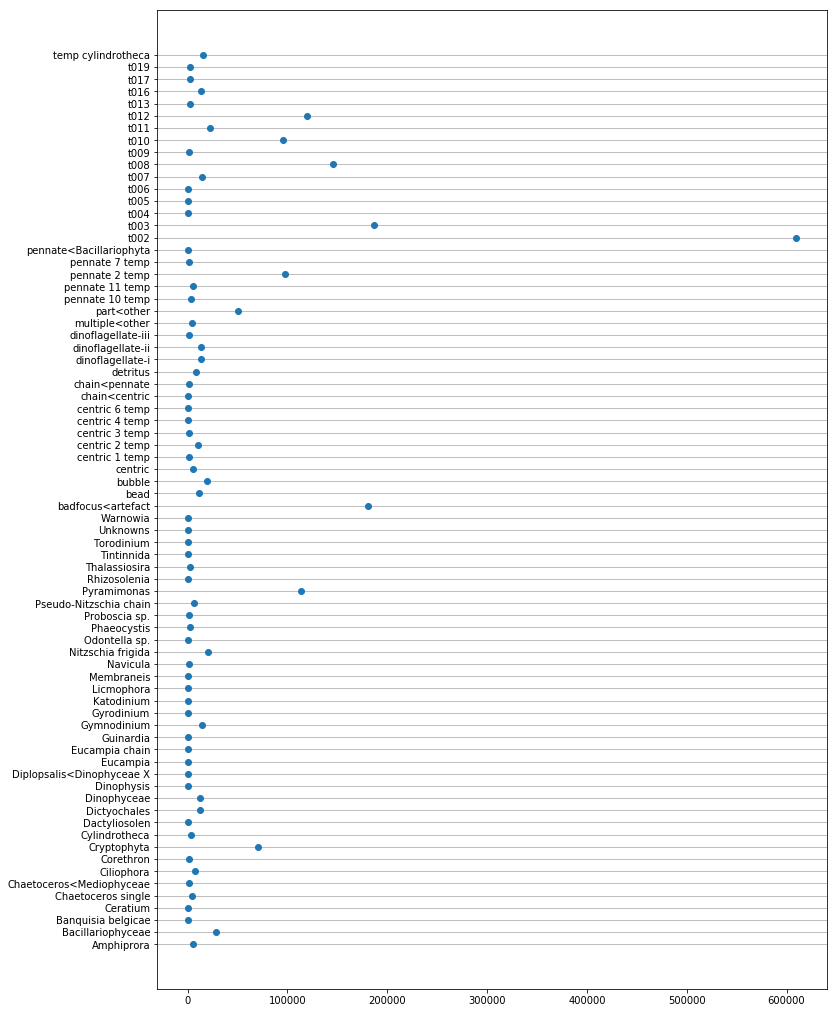

In [48]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(sufficient_classes.values, range(0,len(sufficient_classes)))
ax.set_yticks(range(0,len(sufficient_classes)))
ax.set_yticklabels(list(sufficient_classes.index))
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

NameError: name 'sufficient_classes' is not defined

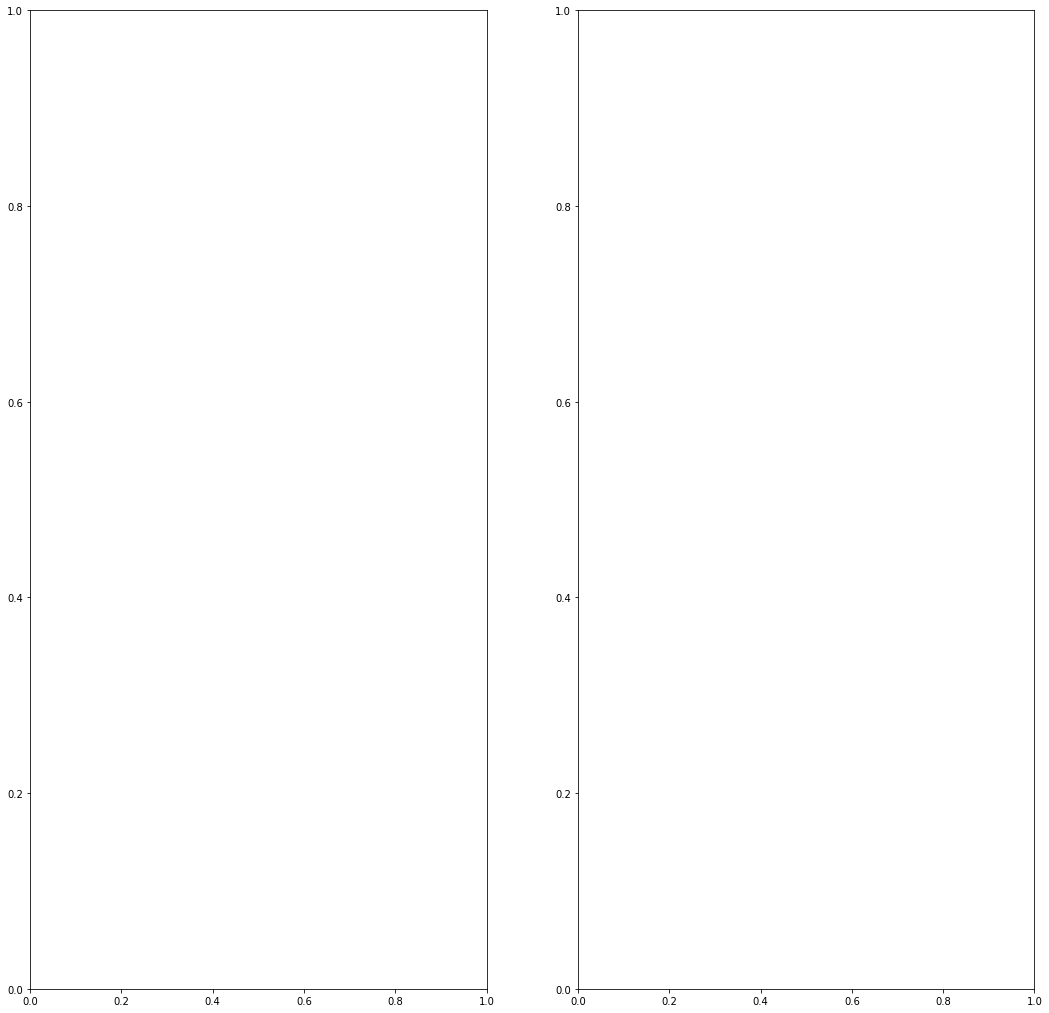

In [145]:
fig, ax = plt.subplots(1,2, figsize=(18, 18))
ax[1].scatter(sufficient_classes.values, range(0,len(sufficient_classes)))
ax[1].set_yticks(range(0,len(sufficient_classes)))
ax[1].set_yticklabels(list(sufficient_classes.index))
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax[1].set_axisbelow(True)
ax[1].set_xlim(-10,5000)
ax[1].set_title("Predictions")


# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

ax[0].scatter(counts, classes)
ax[0].set_yticks(range(0,len(class_id_dict)))
ax[0].set_yticklabels([id_class_dict[x] for x in classes])
ax[0].set_xlim(-10,2500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax[0].set_axisbelow(True)
ax[0].set_title("Validated Data")

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('output_predictions_comparison_full.png', dpi=300)
plt.show()

In [ ]:
# pull out only validated images and run it on them and see how close the total numbers compare